Import the required modules

In [106]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [107]:
def get_tables(file1, file2):
    
  # Reads in files.
  dfs = [pd.read_csv(file1), pd.read_csv(file2)]

  # Create dummies.
  a = 0
  for i, df in enumerate(dfs):
    dfs[i] = pd.get_dummies(df)
    dfs[i] = pd.concat([dfs[i].iloc[:, :4], dfs[i].iloc[:, -5+a:], dfs[i].iloc[:, 4:8+a]], axis=1)
    a += 1

  return dfs


In [108]:
file = 'welding_data_by_properties.csv', 'welding_data_by_welding_types.csv'
df = get_tables(file[0], file[1])

In [109]:
def explore(df, p_start_cols, p_end_cols, t_start_cols, t_end_cols, n_plots, x):
  pos = 1
  for i in range(p_start_cols, p_end_cols):
    print(f'\t{df.columns[i].capitalize()} vs Response values')
    plt.figure(figsize=[15, 5])
    for j in range(t_start_cols, t_end_cols+x):
      plt.subplot(1, n_plots, pos)
      plt.scatter(df.iloc[:, i], df.iloc[:, j])
      plt.ylabel(df.columns[j])
      plt.xlabel(df.columns[i])
      pos += 1
    plt.tight_layout()
    plt.show()
    print('\n')
    pos = 1

Welding Data by Properties

Data Statistical Summary


,current,voltage,welding_speed,plate_thickness,property_flexural_strength,property_hardness,property_heat_input,property_residual_stress,property_tensile_strength,saw,smaw,gmaw,gtaw
count,45.000000,45.000000,45.000000,45.000000,45.00000,45.00000,45.00000,45.00000,45.00000,45.000000,45.000000,45.000000,45.000000
mean,130.000000,28.000000,120.000000,8.000000,0.20000,0.20000,0.20000,0.20000,0.20000,591.946667,488.731111,495.764444,414.564444
std,24.771685,3.302891,24.771685,1.651446,0.40452,0.40452,0.40452,0.40452,0.40452,728.039372,576.698282,574.142362,424.784265
min,100.000000,24.000000,90.000000,6.000000,0.00000,0.00000,0.00000,0.00000,0.00000,95.600000,90.100000,92.400000,48.800000
25%,100.000000,24.000000,90.000000,6.000000,0.00000,0.00000,0.00000,0.00000,0.00000,220.600000,180.200000,191.100000,103.000000
50%,130.000000,28.000000,120.000000,8.000000,0.00000,0.00000,0.00000,0.00000,0.00000,312.600000,264.600000,274.000000,336.800000
75%,160.000000,32.000000,150.000000,10.000000,0.00000,0.00000,0.00000,0.00000,0.00000,410.500000,424.600000,438.400000,422.800000
max,160.000000,32.000000,150.000000,10.000000,1.00000,1.00000,1.00000,1.00000,1.00000,2986.000000,2389.000000,2389.000000,1792.000000




Explore data graphically
	Current vs Response values


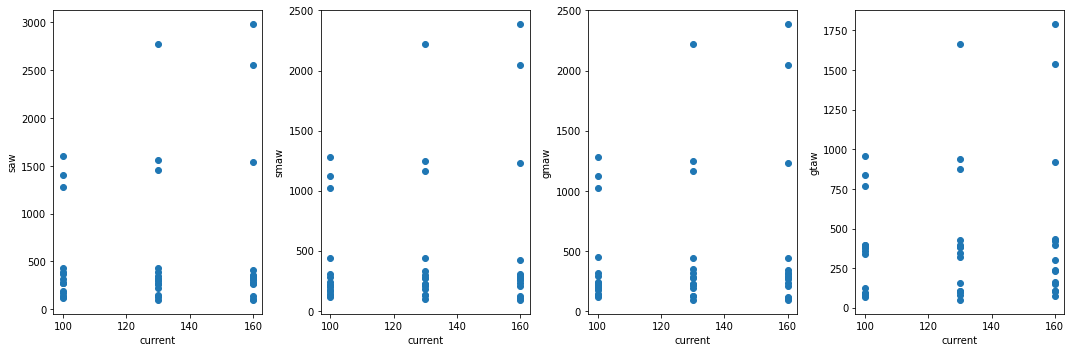



	Voltage vs Response values


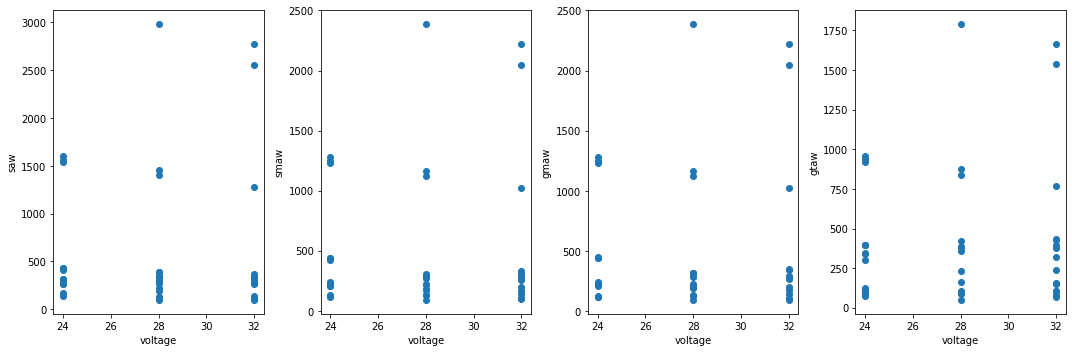



	Welding_speed vs Response values


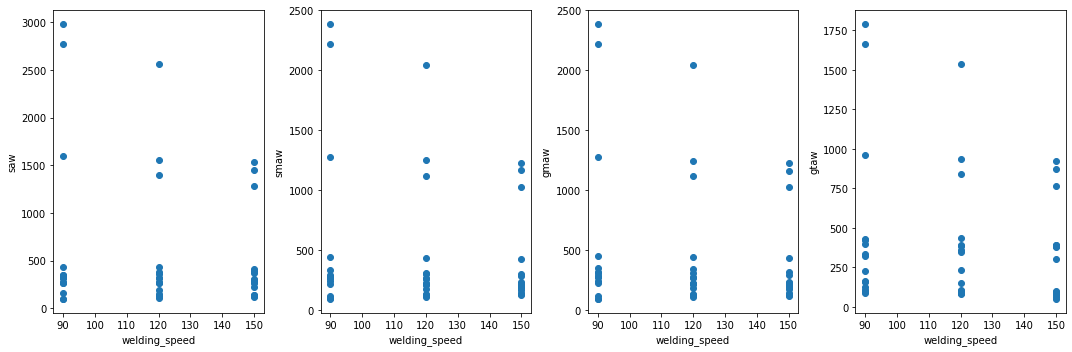



	Plate_thickness vs Response values


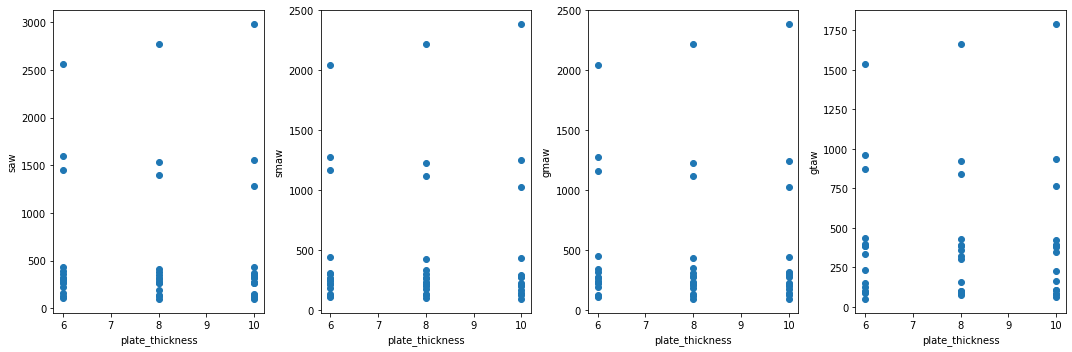



Welding Data by Welding types

Data Statistical Summary


,current,voltage,welding_speed,plate_thickness,welding_type_GMAW,welding_type_GTAW,welding_type_SAW,welding_type_SMAW,heat_input,tensile_strength,flexural_strength,hardness_value,residual_stress
count,36.00000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,130.00000,28.000000,120.00000,8.000000,0.250000,0.250000,0.250000,0.250000,1524.583333,373.286111,272.186111,111.563889,207.138889
std,24.84236,3.312315,24.84236,1.656157,0.439155,0.439155,0.439155,0.439155,584.947537,53.623178,50.159256,24.527665,69.964474
min,100.00000,24.000000,90.00000,6.000000,0.000000,0.000000,0.000000,0.000000,768.000000,275.000000,196.000000,48.800000,82.000000
25%,100.00000,24.000000,90.00000,6.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,329.250000,231.950000,95.500000,162.650000
50%,130.00000,28.000000,120.00000,8.000000,0.000000,0.000000,0.000000,0.000000,1280.000000,383.000000,269.250000,112.700000,205.500000
75%,160.00000,32.000000,150.00000,10.000000,0.250000,0.250000,0.250000,0.250000,1856.000000,425.075000,302.425000,128.850000,266.600000
max,160.00000,32.000000,150.00000,10.000000,1.000000,1.000000,1.000000,1.000000,2986.000000,448.200000,394.400000,164.000000,325.200000




Explore data graphically
	Current vs Response values


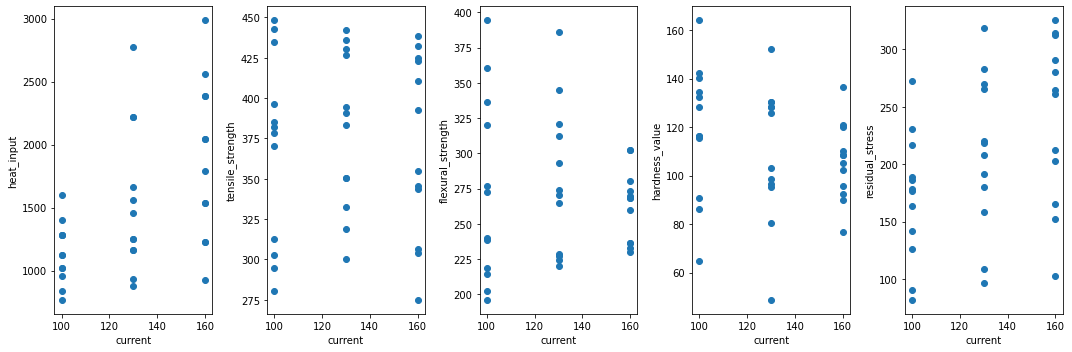



	Voltage vs Response values


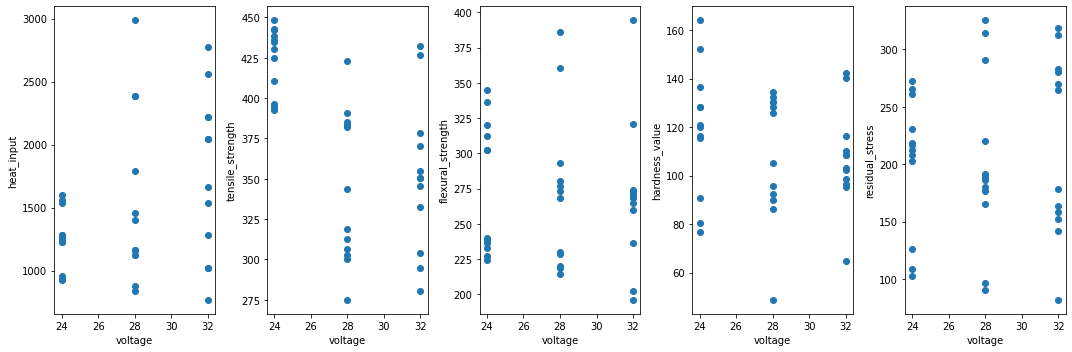



	Welding_speed vs Response values


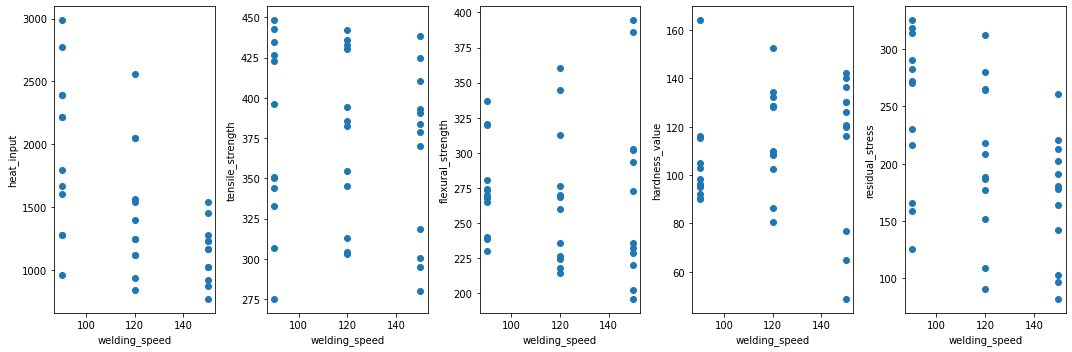



	Plate_thickness vs Response values


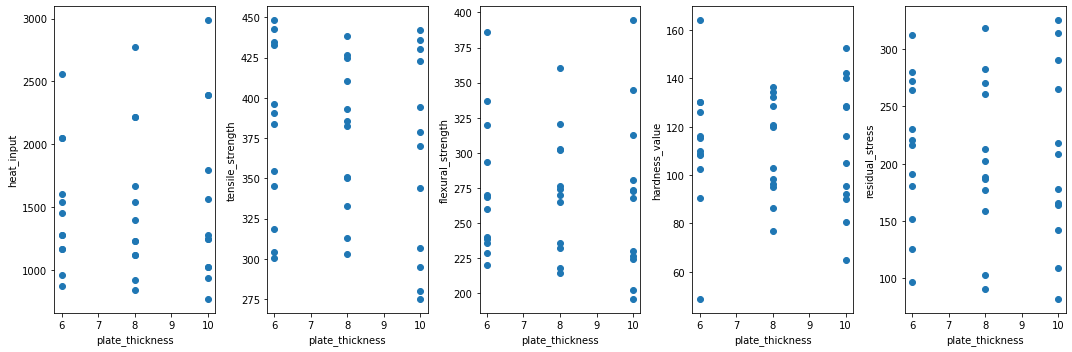

In [96]:
table = ['Welding Data by Properties', 'Welding Data by Welding types']
for x in range(2):
    print(table[x])

    print('\nData Statistical Summary')
    display(df[x].describe())
    print('')

    print('\nExplore data graphically')
    explore(df[x], 0, 4, 9-x, 13-x, 4+x, x)

In [97]:
def generate_train_test(i, df):
  X = df[i].iloc[:, :9-i]
  y = df[i].iloc[:, -4:]

  return train_test_split(X, y,random_state=1, test_size=0.2)

In [99]:
def scale_data(X_train, X_test):
    sc_X = StandardScaler()
    X_trainscaled=sc_X.fit_transform(X_train)
    X_testscaled=sc_X.transform(X_test)

    return X_trainscaled, X_testscaled

In [100]:
def ann_analysis():
    X_trainscaled, X_testscaled = scale_data(X_train, X_test)
    reg = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', random_state=1, max_iter=5000).fit(X_trainscaled, y_train)

    y_pred=reg.predict(X_testscaled)
    r2 = r2_score(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mae, y_pred, reg

In [101]:
def elm_analysis(hidden_size=5000):
  input_size = X_train.shape[1]
  hidden_size = hidden_size
  input_weights = np.random.normal(size=[input_size,hidden_size])
  biases = np.random.normal(size=[hidden_size])

  def relu(x):
    return np.maximum(x, 0, x)

  def hidden_nodes(X):
      G = np.dot(X, input_weights)
      G = G + biases
      H = relu(G)
      return H

  output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

  def predict(X):
      out = hidden_nodes(X)
      out = np.dot(out, output_weights)
      return out

  y_pred = predict(X_test)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  return r2, rmse, mae, y_pred

In [102]:
def disp_matrics(r2, rmse, mae, title):
  print(title)
  print('===============================================')
  print(f'R^2:\t{r2}')
  print(f'rmse:\t{rmse}')
  print(f'mae:\t{mae}')
  print('\n')

In [103]:
def disp_graphs(i, y_test, y_ann_pred, y_elm_pred):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(y_ann_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ANN')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.subplot(1, 2, 2)
  plt.scatter(y_elm_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ELM')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.suptitle('Comparing Models Predictive Abilities', x=.506, y=1.03, fontsize=16)
  plt.tight_layout()
  plt.show()

In [104]:
def disp_compare_graphs():
  plt.figure(figsize = (10, 5))

  x = np.arange(3)
  ann = [ann_r2*100, ann_rmse, ann_mae]
  elm = [elm_r2*100, elm_rmse, elm_mae]
  width = 0.40
    
  # plot data in grouped manner of bar type
  plt.bar(x-0.2, ann, width, color='green')
  plt.bar(x+0.2, elm, width, color='red')
  plt.xticks(x, ['R^2', 'RMSE', 'MAE'])
  plt.title("Comparing metrics for ANN and ELM")
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.legend(["ANN", "ELM"])
  plt.show()

MODEL MATRICS.
Analysis of table 1: Welding Data by Properties
Testing data:


,current,voltage,welding_speed,plate_thickness,property_hardness,property_heat_input,property_residual_stress,property_tensile_strength,saw
3,100,28,120,8,1,0,0,0,128.4
2,100,24,90,6,0,1,0,0,1600.0
30,130,32,90,8,0,0,0,1,350.8
21,160,28,90,10,0,0,0,1,343.7
22,100,28,120,8,0,0,1,0,186.6
41,100,32,150,10,0,1,0,0,1280.0
19,130,24,120,10,0,0,0,0,312.6
35,160,24,150,8,0,1,0,0,1536.0
34,160,24,150,8,0,0,0,1,410.5


ANN modeling
Predicted values using ANN for Welding Data by Properties
C:\Users\NNAMDI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[ 114.61125598,  109.40296858,  109.32891077,   50.71440263],
       [1590.20846508, 1265.91453632, 1263.30501591,  940.38208161],
       [ 387.94935784,  380.81135055,  407.95515553,  421.82457553],
       [ 416.42898801,  433.50690735,  454.08534133,  389.75679947],
       [ 181.26263206,  166.41045173,  174.39063574,   90.26437043],
       [1368.03683194, 1104.26837194, 1105.68600239,  843.70267867],
       [ 293.60365589,  274.7838289 ,  268.99210909,  273.32845469],
       [1584.06116346, 1264.47184301, 1264.53219558,  949.38532896],
       [ 424.07098383,  350.963657  ,  364.25670389,  401.53796402]])

The ANN model performance for testing set
R^2:	0.9829340884509441
rmse:	57.08716406594958
mae:	43.681578585018876


Analysis of table 1: Welding Data by Properties
Testing data:


,current,voltage,welding_speed,plate_thickness,property_hardness,property_heat_input,property_residual_stress,property_tensile_strength,saw
3,100,28,120,8,1,0,0,0,128.4
2,100,24,90,6,0,1,0,0,1600.0
30,130,32,90,8,0,0,0,1,350.8
21,160,28,90,10,0,0,0,1,343.7
22,100,28,120,8,0,0,1,0,186.6
41,100,32,150,10,0,1,0,0,1280.0
19,130,24,120,10,0,0,0,0,312.6
35,160,24,150,8,0,1,0,0,1536.0
34,160,24,150,8,0,0,0,1,410.5


ELM modeling
Predicted values using ELM for Welding Data by Properties


array([[ 128.39657015,  122.33078296,  123.8259607 ,  100.41799126],
       [1600.01024815, 1289.65036874, 1288.57614181,  949.63339945],
       [ 350.80688734,  285.57971902,  291.90295862,  309.71618677],
       [ 343.69936698,  316.542963  ,  344.08428118,  289.64235277],
       [ 186.61390411,  143.09492478,  149.10815486,   63.81216612],
       [1280.01103257, 1057.30469148, 1054.13140569,  734.58929047],
       [ 312.57233965,  279.32865648,  299.70480564,  286.66437859],
       [1536.0364359 , 1239.97285094, 1239.92606552,  933.0197314 ],
       [ 410.49328141,  371.24934348,  407.59314029,  352.92804891]])

The ELM model performance for testing set
R^2:	0.9848551640091463
rmse:	42.42922829196925
mae:	28.819613756580555






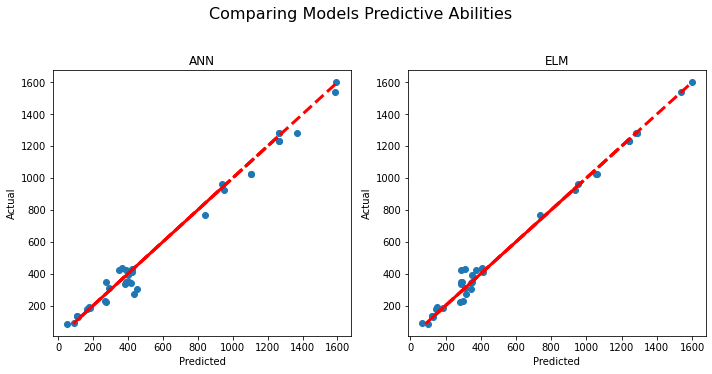

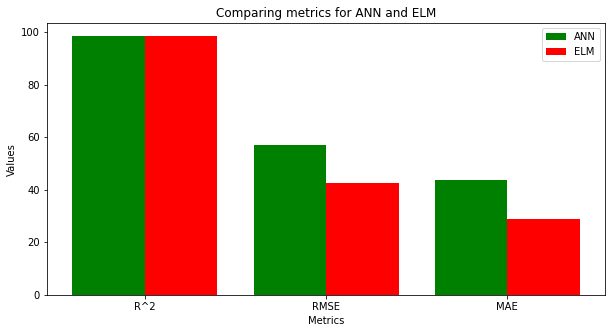

Analysis of table 2: Welding Data by Welding types
Testing data:


,current,voltage,welding_speed,plate_thickness,welding_type_GTAW,welding_type_SAW,welding_type_SMAW,heat_input
30,100,28,120,8,0,0,0,1120
34,100,24,90,6,0,0,1,1280
28,100,24,90,6,1,0,0,960
3,160,28,90,10,1,0,0,1792
19,100,32,150,10,0,0,1,1024
17,160,32,120,6,0,0,1,2048
21,130,24,120,10,1,0,0,936
23,100,32,150,10,1,0,0,768


ANN modeling
Predicted values using ANN for Welding Data by Welding types


array([[332.12366656, 202.18004832, 124.80145787, 167.72205216],
       [364.91555412, 222.69831115, 125.79065255, 205.30998986],
       [443.53171694, 368.42614016,  89.60321898,  98.91406095],
       [330.72612448, 245.90760548, 110.4654513 , 173.93676944],
       [328.03512323, 247.03810621, 165.42041585, 197.89398659],
       [297.19131997, 249.8784719 ,  94.74636107, 250.47107795],
       [404.78969937, 308.08174791, 118.9494048 , 116.56199399],
       [375.35441636, 365.49940236, 114.6221106 , 121.91904593]])

The ANN model performance for testing set
R^2:	0.24961512482955134
rmse:	33.298371630119824
mae:	25.77244604982174


Analysis of table 2: Welding Data by Welding types
Testing data:


,current,voltage,welding_speed,plate_thickness,welding_type_GTAW,welding_type_SAW,welding_type_SMAW,heat_input
30,100,28,120,8,0,0,0,1120
34,100,24,90,6,0,0,1,1280
28,100,24,90,6,1,0,0,960
3,160,28,90,10,1,0,0,1792
19,100,32,150,10,0,0,1,1024
17,160,32,120,6,0,0,1,2048
21,130,24,120,10,1,0,0,936
23,100,32,150,10,1,0,0,768


ELM modeling
Predicted values using ELM for Welding Data by Welding types


array([[322.87351847, 220.86766259, 132.81860997, 188.84395754],
       [425.16016137, 233.26052702, 113.15868505, 211.69886669],
       [398.02282969, 202.32952038,  93.78478884, 108.6096963 ],
       [120.07221241, 265.06049509,  54.30019702,  93.35075653],
       [270.9667211 , 192.93625708, 143.54319121, 166.85635543],
       [324.89248603, 262.15604585, 106.67724187, 260.31225582],
       [495.03234509, 320.22444152,  92.86504604, 109.15192987],
       [396.50693178, 370.7152257 ,  68.38517632, 109.91816635]])

The ELM model performance for testing set
R^2:	-0.383248566879143
rmse:	64.37084783930916
mae:	28.712711572602686






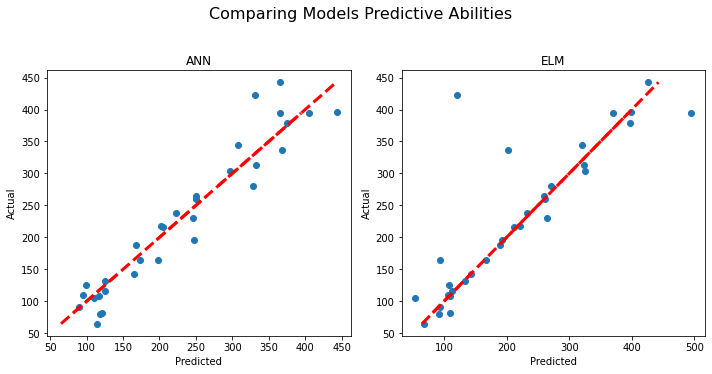

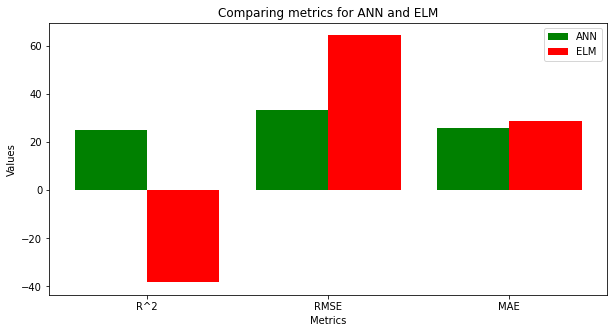

In [105]:
print('MODEL MATRICS.')
print('===============================================')

# df[0].drop(df[0].iloc[:, 4:5], inplace=True, axis=1)
# df[1].drop(df[1].iloc[:, 4:5], inplace=True, axis=1)

for i in range(2):
    for model in ['ANN', 'ELM']:
        print(f'Analysis of table {i+1}: {table[i]}')
        X_train, X_test, y_train, y_test = generate_train_test(i, df)

        print('Testing data:')
        display(X_test)

        if model == 'ANN':
            print('ANN modeling')
            ann_r2, ann_rmse, ann_mae, y_ann_pred, reg = ann_analysis()

            print(f'Predicted values using ANN for {table[i]}')
            display(y_ann_pred)
            disp_matrics(ann_r2, ann_rmse, ann_mae, 'The ANN model performance for testing set')
        else:
            print('ELM modeling')
            elm_r2, elm_rmse, elm_mae, y_elm_pred = elm_analysis()

            print(f'Predicted values using ELM for {table[i]}')
            display(y_elm_pred)
            disp_matrics(elm_r2, elm_rmse, elm_mae, 'The ELM model performance for testing set')

    print('\n')

    disp_graphs(i, y_test, y_ann_pred, y_elm_pred)
    disp_compare_graphs()